##<font color='purple' face="Times New Roman">Faculdade de Tecnologia SENAI Mariano Ferraz                                                             </font>

### <font color='purple'>Curso Superior de Tecnologia em Automação Industrial                                                        </font>

#####Disciplina: </font> <font color='purple'>Internet das Coisas </font>


#####Assunto:<font color='ciano'> Projeto que visa a implementação da técnica de Árvore de Decisão para a determinação de respostas ao tratamento de imunoterapia em relação à verrugas causadas pelo HPV.     </font>

#####Aluno:<font color='green' face="Times New Roman"> Lucas Lopes Floriano</font>

#####Turma:<font color='Green' face="Times New Roman"> AUTOS3 - Graduação</font>

 --------------------------
- <font color ='brown'>Leitura de arquivos .csv            </font> 
- <font color ='brown'>Uso da Biblioteca sklearn           </font>
- <font color ='brown'>Programação em pythom para gerar árvore de decisões </font>

###<font color ='purple'>
Setembro/2020 
</font>

#<font color ='Navy'>
    Referências da base de dados:
    1. F. Khozeimeh, R. Alizadehsani, M. Roshanzamir, A. Khosravi, P. Layegh e S. Nahavandi, 'An expert system for select wart treatment method,' Computers in Biology and Medicine, vol. 81, pp. 167-175, 2/1 / 2017.
    2. F. Khozeimeh, F. Jabbari Azad, Y. Mahboubi Oskouei, M. Jafari, S. Tehranian, R. Alizadehsani, et al., 'Intralesional immunotherapy comparado to cryotherapy in the treatment of warts, 'International Journal of Dermatology, 2017, DOI: 10.1111 / ijd.13535
    3. https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset
    4. https://pdfs.semanticscholar.org/6306/70ddd26e89525c4ab56eb4ebd8bb9a8e6bfb.pdf 
</font>

---------------------------------------------------------------------
</font>



### <font>          1) O primeiro passo para o algoritimo em python funcionar foi importar as bibliotecas e métodos Tree e Label encoder                                             </font>


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

a=1
global tt
tt=[]

### <font>  2) O segundo passo foi importar a fonte de dados que estão alocados em uma pasta do google drive                                             </font>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
RESP = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projeto-IoT/PROJOK.csv', sep = ';')

Mounted at /content/drive


### <font>  3) O terceiro passo consiste em utilizar as funções da biblioteca sklearn para transformar os dados das linhas e colunas da fonte em dados numéricos inteiros                                             </font>
<font> Exemplificando:
</font>
- 1 <font color ='brown'>Observamos os dados da coluna <font color ='green'>'C'</font> =<font color ='ciano'> 1, 1.5, 1,.6, 1.8, etc...</font>, do tipo float e  
 da coluna <font color ='green'>'D'</font> = <font color ='ciano'> arroz, batata, feijão, macarrão, abóbora, etc..</font>, do tipo string;            </font>

- 2 <font color ='brown'>Uso da Biblioteca sklearn com a <font color ='ciano'>função fit_transform </font>         </font>
- 3 <font color ='brown'>Obtendo um resultado = 
    - <font color ='green'>Coluna 'C'</font> =<font color ='ciano'> 0,1, 2,3, 4, etc(...);    
    -  <font color ='green'>Coluna 'D'</font> = <font color ='ciano'> 0, 1, 2, 3, 4, etc(...)</font>
     </font>


In [ ]:
change = LabelEncoder()
RESP['age']                 = change.fit_transform(RESP['age'])
RESP['sex']                 = change.fit_transform(RESP['sex'])
RESP['Area']                = change.fit_transform(RESP['Area'])
RESP['induration_diameter'] = change.fit_transform(RESP['induration_diameter'])
RESP['Type']                = change.fit_transform(RESP['Type'])
RESP['Number_of_Warts']     = change.fit_transform(RESP['Number_of_Warts'])
RESP['Result_of_Treatment'] = change.fit_transform(RESP['Result_of_Treatment'])
RESP['Time']                = change.fit_transform(RESP['Time'])


### <font>  4) Criação da Árvore de decisões                                             </font>
<font> Explicando: 

- O primeiro passo será desvincular e indicar qual a coluna "target", que contém o objetivo, do resto da tabela.
  -  Neste caso é a coluna <font color = 'blue'>'Result_of_Treatment'</font>, que é a resposta de que se o tratamento apresentará resultados ou não.
- O segundo é rodar o aa função <font color = 'blue'>'tree.DecisionTreeClassifier'</font> que construirá a árvore de decisões seguindo os critérios padrões.
   -  Neste caso, foram alterados o critério <font color = 'blue'>'entrophy'</font> que realiza contas para decidir a rota/ramo com maior ganho de informação, decidir quais informações são mais úteis para chegar ao valor do Target.

<font color = 'orange'>- Após criada, a àrvore é salva numa pasta do drive em forma de pdf - </font> 
</font>


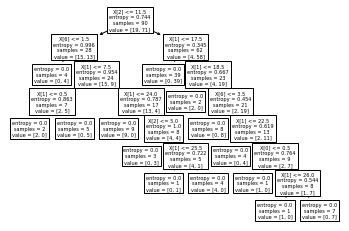

In [ ]:
Y = RESP['Result_of_Treatment']
X =  RESP.drop(['Result_of_Treatment'], axis =1)


clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  splitter='best', max_depth=None,
                                  min_samples_split=2, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, random_state=None, 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, class_weight=None, 
                                  presort='deprecated', ccp_alpha=0.0)
clf = clf.fit(X,Y)
tree.plot_tree(clf)
a= int(a)
if a >= 2:
  a= 0

a = a+1
a= str(a)
fig = plt.gcf()
fig.savefig('tree'+a+'.pdf', format ='pdf')
plt.show()

### <font>  5) Entradas e algoritimo                                           </font>
<font> Foram criadas duas funções, <font color = 'ciano'>questions</font> e<font color = 'ciano'> 
ArvoreDecis</font>, que, respectivamente, faz perguntas ao usuário e registra a resposta em variáveis, e compara as variáveis com as ramificações da arvore de decisões criada. 
</font>

In [ ]:
def ArvoreDecis():
  
  
  if time <= 11.5:
    if diam <=1.5:
      print('----O tratamento provavelmente retornará um resultado positivo!----')
    elif diam >1.5:
        if age <= 7.5:
          if age <= 0.5:
            print('----O tratamento provavelmente retornará um resultado positivo!----')          
          elif age >0.5:
            print('----O tratamento provavelmente retornará um resultado negativo!----')
        elif age >7.5:
          if age<= 24.0:
            print('----O tratamento provavelmente retornará um resultado positivo!----') 
          elif age> 24.0:
            if time <= 5.0:
              print('----O tratamento provavelmente retornará um resultado negativo!----')
            elif time >5.0:
              if area <= 55.5:
                print('----O tratamento provavelmente retornará um resultado positivo!----')
              else: print('----O tratamento provavelmente retornará um resultado negativo!----')  

  elif time > 11.5:
    if age <= 17.5:
      print('----O tratamento provavelmente retornará um resultado negativo!----')
    elif age>17.5:  
      if age <= 18.5:
        print('----O tratamento provavelmente retornará um resultado positivo!----')
      elif age > 18.5:
        if diam <= 3.5:
          print('----O tratamento provavelmente retornará um resultado negativo!----')
        elif diam>3.5:
          if diam <= 7.5:
            if age <= 30.5:
              if time <= 23.5:
                print('----O tratamento provavelmente retornará um resultado positivo!----')
              elif time > 23.5:
                if area <=39.9:
                  print('----O tratamento provavelmente retornará um resultado negativo!----')
                elif area > 39.9:
                  if age <= 26.0:
                    print('----O tratamento provavelmente retornará um resultado positivo!----')
                  else:
                    print('----O tratamento provavelmente retornará um resultado negativo!----')  
            elif age > 30.5:
              print('----O tratamento provavelmente retornará um resultado negativo!----')
          else: print('----O tratamento provavelmente retornará um resultado positivo!----')  

In [ ]:
def questions():

  global sex,age,time,nunverr,verr, area,diam
  global testee

  sex = int(input('''Qual o sexo da pessoa?
  [1]Homem
  [2]Mulher
  '''))
  while(sex<1 or sex>2):
    print("O valor deve ser 1 ou 2")
    sex = int(input('''Qual o sexo da pessoa?
  [1]Homem
  [2]Mulher
  '''))
  age = int(input('''Qual a idade?
  '''))
  while(age<0):
    print("O valor deve ser positivo")
    age = int(input('''Qual a idade correta?
  '''))
    if(age>123):
      print("Esta pessoa está viva?")
      age = int(input('''Qual a idade correta?
  '''))  
  time = float(input('''Quanto tempo demorou para iniciar o tratamento?
  [em meses]
  '''))
  while(time<0):
    print("O valor deve ser positivo")
    time = float(input('''Quanto tempo demorou para iniciar o tratamento?
  [em meses]
  '''))
  nunverr = int(input('''Quantas verrugas possui?
  '''))
  while(nunverr<0):
    print("Se a pessoa não possui verrugas, não necessita de tratamento, caso tenha errado, tente novamente:")
    nunverr = int(input('''Quantas verrugas possui?
  '''))
  verr = int(input('''Qual o tipo da verruga?
  [1]Comum
  [2]Plantaria
  [3]Ambas
  '''))
  while(verr<1 or verr>3):
    print("O valor deve ser 1, 2 ou 3")
    verr = int(input('''Qual o tipo da verruga?
  [1]Comum
  [2]Plantaria
  [3]Ambas
  '''))
  area = float(input('''Qual a área da superfície da verruga?
  [mm²]
  '''))
  while(area<0):
    print("O valor deve ser positivo")  
    area = float(input('''Qual a área da superfície da verruga?
  [mm²]
  '''))
  diam = float(input('''Qual o diâmetro da verruga no primeiro teste?
  [mm] 
  '''))  
  while(diam<0):
    print("O valor deve ser positivo")
    diam = float(input('''Qual o diâmetro da verruga no primeiro teste?
  [mm] 
  '''))

  testee = [sex,age,time,nunverr,verr, area,diam]
  
  #print(testee)

### <font>  5.1) Entradas                                          </font>
<font> Utilizando as duas funções criadas, <font color = 'ciano'>as entradas</font> geram perguntas que são salvas em <font color = 'ciano'> 
 variáveis</font>, que são utilizadas pelo algoritimo. 
</font>


In [ ]:
questions()
ArvoreDecis()

Qual o sexo da pessoa?
  [1]Homem
  [2]Mulher
  1
Qual a idade?
  20
Quanto tempo demorou para iniciar o tratamento?
  [em meses]
  6
Quantas verrugas possui?
  3
Qual o tipo da verruga?
  [1]Comum
  [2]Plantaria
  [3]Ambas
  1
Qual a área da superfície da verruga?
  [mm²]
  50
Qual o diâmetro da verruga no primeiro teste?
  [mm] 
  49
----O tratamento provavelmente retornará um resultado positivo!----


###<font> Outro método para a machine learn é o LinearSVC, da mesma biblioteca, sklearn </font>
<font> Utilizando a mesma base de dados, podemos observar se o métodos da árvore de decisões, confere com o algorítimo do LinearSVC.
</font>

In [ ]:
from sklearn.svm import LinearSVC
import collections

In [ ]:
Y = RESP['Result_of_Treatment']
X =  RESP.drop(['Result_of_Treatment'], axis =1)

modelo = LinearSVC()
mod = modelo.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
xq = RESP.iloc[[-1]]
xq =  xq.drop(['Result_of_Treatment'], axis =1)
TTABLE = xq

In [ ]:
if TTABLE.iloc[[-1]].values.tolist() == [testee]:
  print("Não houveram novos testes, mas os serão mostrados os ultimos", len(prev), " testes")
else:
  TTABLE = TTABLE.append({ 'sex': testee[0] , 'age' : testee[1], 'Time' : testee[2], 'Number_of_Warts' : testee[3], 'Type' : testee[4], 'Area' : testee[5], 'induration_diameter' : testee[6]} , ignore_index=True)
TTABLE.head	
prev = modelo.predict(TTABLE.values.tolist())
print("O valor da previsão 'predict' é = ",prev)
print("Com ", collections.Counter(prev)[0]," valores negativos e ",collections.Counter(prev)[1]," valores positivos.")

Não houveram novos testes, mas os serão mostrados os ultimos 90  testes
O valor da previsão 'predict' é =  [1 1]
Com  0  valores negativos e  2  valores positivos.


In [ ]:
questions()

####<font>Código utilizado para enterpretar valoes da àrvore de decisões, como: X[1,2,3,]</font>

In [ ]:
#cÓDIGO PARA ENTENDER O QUE A ÁRVORE DE DECISÕES EXPRIME COMO X[1,2,3,...]
xq = (sorted(list(X['Time'])))
print(xq)
lte = RESP.loc[ (RESP['Time'] <= 11.5)] 
#lte2 = lte.loc[lte['induration_diameter'] >= 1.5]
#lte3 = lte2.loc[lte2['age'] > 7.5]
#lte4 = lte3.loc[lte3['age'] <= 0.5]
print(len(lte))

[0, 1, 2, 2, 2, 3, 3, 3, 4, 5, 5, 6, 7, 7, 7, 7, 7, 8, 8, 8, 9, 9, 10, 10, 10, 11, 11, 11, 12, 13, 13, 13, 13, 14, 15, 15, 16, 17, 17, 17, 18, 19, 19, 20, 21, 21, 21, 21, 22, 23, 23, 24, 24, 24, 25, 25, 26, 27, 27, 28, 28, 28, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 34, 34, 34, 35, 35, 35, 35, 36, 37, 37, 38]
28
